<a href="https://colab.research.google.com/github/navodagunarathne/Car-price-prediction/blob/main/Predictive_insight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1.Import the Data set
#2.Check for duplicates
#3.Checking data types and editing(Preprocessing)
#4.Divide the data set as TRAIN SET and TEST SET
#5.Missing value imputation
#6.Outlier detection
#7.Feature Engineering
#8.EDA
#9.Feature Scaling
#10.Encoding categorical variables
#11.Model Fitting
#12.Model Evaluation

# 1.Import the Data set

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Carprice.csv')

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [ ]:
df.shape

(8128, 12)

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [ ]:
df.dtypes


name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object

# 2.Check for duplicates

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8123    False
8124    False
8125    False
8126     True
8127     True
Length: 8128, dtype: bool

In [ ]:
df.duplicated().sum()

1202

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8123    False
8124    False
8125    False
8126     True
8127     True
Length: 8128, dtype: bool

In [ ]:
import pandas as pd

# Identify duplicated rows
duplicated_rows = df[df.duplicated(keep=False)]

# Display all duplicated rows
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(duplicated_rows)


                                                 name  year  selling_price  \
31                                 Fiat Palio 1.2 ELX  2003          70000   
32                          Maruti Omni 8 Seater BSIV  2012         150000   
33                     Hyundai i20 1.2 Asta Dual Tone  2018         730000   
34                           Maruti Vitara Brezza LDi  2017         650000   
35                   Maruti Alto 800 CNG LXI Optional  2019         330000   
36                         Maruti Alto K10 VXI Airbag  2019         366000   
37                   Hyundai Verna VTVT 1.6 SX Option  2019        1149000   
38                                        Datsun GO D  2016         150000   
39                       Tata Safari DICOR 2.2 LX 4x2  2011         425000   
40                                     Maruti 800 Std  2012         150000   
41                 Jeep Compass 1.4 Limited Plus BSIV  2019        2100000   
42                               Honda City i VTEC VX  2018     

In [ ]:
import pandas as pd

# Drop all duplicated rows
data_no_duplicates = df.drop_duplicates(keep=False)

# Display the DataFrame without duplicated rows
data_no_duplicates


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.1,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0


In [ ]:
df.shape

(8128, 12)

In [ ]:
data_no_duplicates.shape

(6301, 12)

In [ ]:
# Rename the DataFrame
data = data_no_duplicates

# Now `data` contains the DataFrame without duplicates


# 3.Checking data types and editing(Preprocessing)

In [ ]:
# Step 2: Convert the column to numeric, coercing errors to NaN
data['max_power'] = pd.to_numeric(data['max_power'], errors='coerce')

print("\nConverted Data:")
print(data)

# Verify the data type of the column
print("\nData Types:")
print(data.dtypes)



Converted Data:
                                   name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2              Honda City 2017-2020 EXi  2006         158000     140000   
3             Hyundai i20 Sportz Diesel  2010         225000     127000   
4                Maruti Swift VXI BSIII  2007         130000     120000   
...                                 ...   ...            ...        ...   
8121  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
8122         Hyundai i20 Magna 1.4 CRDi  2014         475000      80000   
8123                  Hyundai i20 Magna  2013         320000     110000   
8124              Hyundai Verna CRDi SX  2007         135000     119000   
8125             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  \
0     Diesel  Indiv

<ipython-input-92-6968e9074c95>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['max_power'] = pd.to_numeric(data['max_power'], errors='coerce')


In [ ]:
# Check for non-integer values in a specific column (e.g., 'SalePrice')
column_name = 'max_power'
numeric_column = pd.to_numeric(data[column_name], errors='coerce')

# Check for NaN values, indicating non-integer or non-numeric values
non_integer_values = numeric_column[numeric_column.isna()]

if non_integer_values.empty:
    print(f"The column '{column_name}' contains only integer values.")
else:
    print(f"The column '{column_name}' contains non-integer or mixed data types:")
    print(non_integer_values)


The column 'max_power' contains non-integer or mixed data types:
13     NaN
78     NaN
87     NaN
119    NaN
138    NaN
        ..
7740   NaN
7996   NaN
8009   NaN
8068   NaN
8103   NaN
Name: max_power, Length: 196, dtype: float64


In [ ]:
data.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power             float64
seats                 float64
dtype: object

# 4.Divide the data set as TRAIN SET and TEST SET

In [ ]:
#First we have to devide the data set in to Features(predictor variables) and Label(target variable/response variable)

from sklearn.model_selection import train_test_split

# target variable (y) ='selling_price'
# features (X) = all other variables except selling_price


X = data.drop(columns=['selling_price'])  # Features
y = data['selling_price']  # Target variable


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training set (80%) and test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train contain the training set, and X_test and y_test contain the test set


In [ ]:
# here gives the no:of rows that each data set includes and no: of columns that include
# N.B no:of variables =11 ( except response variable)


X_train.shape, X_test.shape

((5040, 11), (1261, 11))

# 5.Missing value imputation

In [ ]:
data.isnull()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,False,False,False,False,False,False,False,False,False,False,False,False
8122,False,False,False,False,False,False,False,False,False,False,False,False
8123,False,False,False,False,False,False,False,False,False,False,False,False
8124,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()


name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    195
engine                195
max_power             196
seats                 195
dtype: int64

In [ ]:
X_train

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
7796,Hyundai Xcent 1.1 CRDi Base,2015,55000,Diesel,Dealer,Manual,First Owner,24.40,1120.0,71.00,5.0
2975,Toyota Fortuner 3.0 Diesel,2011,120000,Diesel,Individual,Manual,Third Owner,11.50,2982.0,171.00,7.0
2700,Mahindra Bolero Power Plus SLX,2017,100000,Diesel,Individual,Manual,Second Owner,16.50,1493.0,70.00,7.0
7257,Mahindra Bolero Power Plus ZLX,2017,60000,Diesel,Individual,Manual,Second Owner,16.50,1493.0,70.00,7.0
7264,Maruti Ciaz VDi Plus,2015,50000,Diesel,Individual,Manual,First Owner,26.21,1248.0,88.50,5.0
...,...,...,...,...,...,...,...,...,...,...,...
4947,Ford Ecosport 1.5 DV5 MT Titanium Optional,2017,77524,Diesel,Dealer,Manual,First Owner,22.70,1498.0,89.84,5.0
6713,Mahindra Xylo D2,2011,200000,Diesel,Individual,Manual,Third Owner,13.00,2489.0,95.00,8.0
6751,Maruti Swift Dzire VDi,2009,90000,Diesel,Individual,Manual,Second Owner,19.30,1248.0,73.90,5.0
6935,Hyundai Tucson CRDi,2006,128000,Diesel,Individual,Manual,Fourth & Above Owner,12.60,1991.0,112.00,7.0


In [ ]:
# Checking for missing values in the training set
print("Missing values in training set:")
print(X_train.isnull().sum())

Missing values in training set:
name                    0
year                    0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    163
engine                163
max_power             164
seats                 163
dtype: int64


In [ ]:
# Checking for missing values in the testing set
print("Missing values in testing set:")
print(X_test.isnull().sum())

Missing values in testing set:
name                   0
year                   0
km_driven              0
fuel                   0
seller_type            0
transmission           0
owner                  0
mileage(km/ltr/kg)    32
engine                32
max_power             32
seats                 32
dtype: int64


In [ ]:
# Check for non-integer values in a specific column (e.g., 'SalePrice')
column_name = 'max_power'
numeric_column = pd.to_numeric(data[column_name], errors='coerce')

# Check for NaN values, indicating non-integer or non-numeric values
non_integer_values = numeric_column[numeric_column.isna()]

if non_integer_values.empty:
    print(f"The column '{column_name}' contains only integer values.")
else:
    print(f"The column '{column_name}' contains non-integer or mixed data types:")
    print(non_integer_values)

The column 'max_power' contains non-integer or mixed data types:
13     NaN
78     NaN
87     NaN
119    NaN
138    NaN
        ..
7740   NaN
7996   NaN
8009   NaN
8068   NaN
8103   NaN
Name: max_power, Length: 196, dtype: float64


In [ ]:
specific_row = data.iloc[13]  # Note that .iloc uses zero-based indexing

# Display the specific row
print("Specific Row (using .iloc):")
print(specific_row)

Specific Row (using .iloc):
name                  Maruti Swift 1.3 VXi
year                                  2007
selling_price                       200000
km_driven                            80000
fuel                                Petrol
seller_type                     Individual
transmission                        Manual
owner                         Second Owner
mileage(km/ltr/kg)                     NaN
engine                                 NaN
max_power                              NaN
seats                                  NaN
Name: 13, dtype: object


# missing value imputation- PREDICTOR VARIABLES

###To create a histogram of a float64 variable while excluding missing values, you can use the hist() method from pandas or the hist() function from matplotlib. Both methods automatically ignore NaN values when plotting.



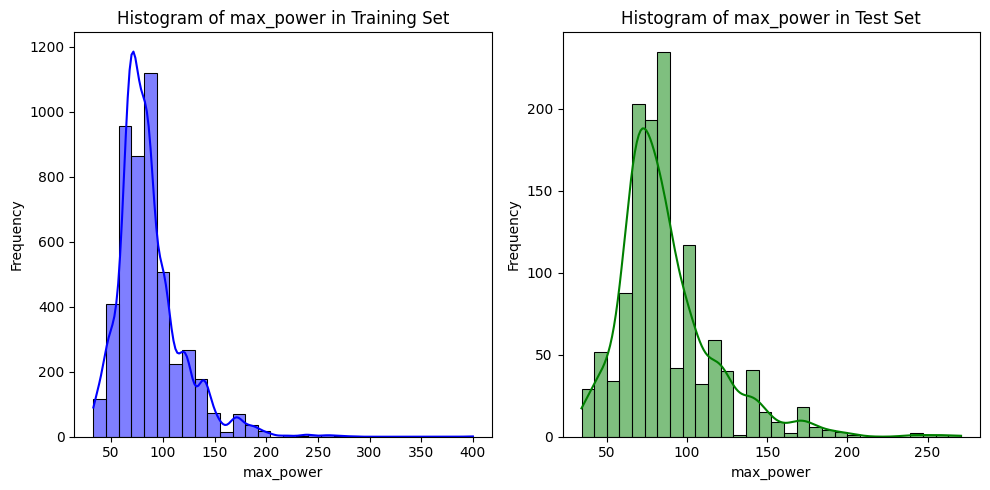

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for 'max_power' in training set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(X_train['max_power'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Histogram of max_power in Training Set')
plt.xlabel('max_power')
plt.ylabel('Frequency')




import matplotlib.pyplot as plt
import seaborn as sns


# Plot histogram for 'max_power' in test set
plt.subplot(1, 2, 2)
sns.histplot(X_test['max_power'], bins=30, kde=True, color='green', edgecolor='black')
plt.title('Histogram of max_power in Test Set')
plt.xlabel('max_power')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Sample data for demonstration
# X_train and X_test are supposed to be your training and test datasets

# Step 1: Ensure missing values are represented as NaN for the 'max_power' column
X_train['max_power'] = X_train['max_power'].replace('missing', np.nan)
X_test['max_power'] = X_test['max_power'].replace('missing', np.nan)

# Step 2: Calculate the median for the 'max_power' column in the training set
median_max_power = X_train['max_power'].astype(float).median()

# Print the median value for 'max_power'
print("Median value for 'max_power' in the training set:", median_max_power)

# Step 3: Replace missing values in the 'max_power' column in the training set with the median
X_train['max_power'].fillna(median_max_power, inplace=True)

# Verify imputation in the training set
print("Training set after imputing missing values with median for 'max_power':")
print(X_train['max_power'].head())

# Step 4: Replace missing values in the 'max_power' column in the test set with the median from the training set
X_test['max_power'].fillna(median_max_power, inplace=True)

# Verify imputation in the test set
print("Test set after imputing missing values with median from training set for 'max_power':")
print(X_test['max_power'].head())


Median value for 'max_power' in the training set: 81.83
Training set after imputing missing values with median for 'max_power':
7796     71.0
2975    171.0
2700     70.0
7257     70.0
7264     88.5
Name: max_power, dtype: float64
Test set after imputing missing values with median from training set for 'max_power':
2446    47.30
492     47.00
2012    86.79
7433    81.83
797     67.00
Name: max_power, dtype: float64


In [ ]:
# Check for missing values in the 'max_power' column in the training set
missing_train_max_power = X_train['max_power'].isna().sum()
print("Number of missing values in 'max_power' in the training set:", missing_train_max_power)

# Check for missing values in the 'max_power' column in the test set
missing_test_max_power = X_test['max_power'].isna().sum()
print("Number of missing values in 'max_power' in the test set:", missing_test_max_power)


Number of missing values in 'max_power' in the training set: 0
Number of missing values in 'max_power' in the test set: 0


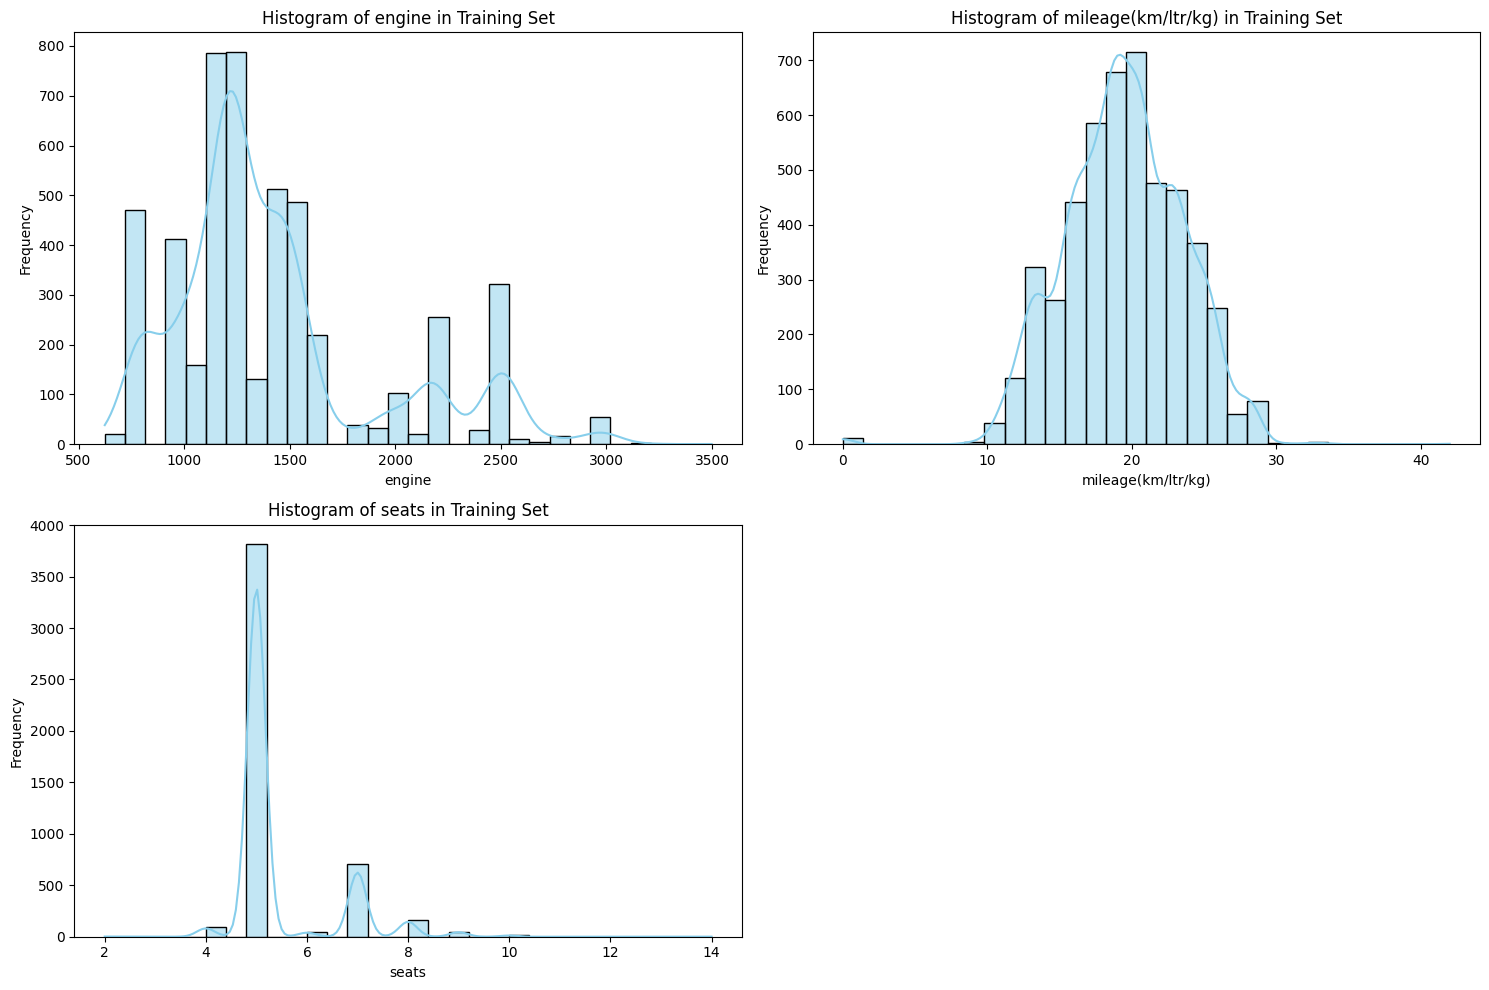

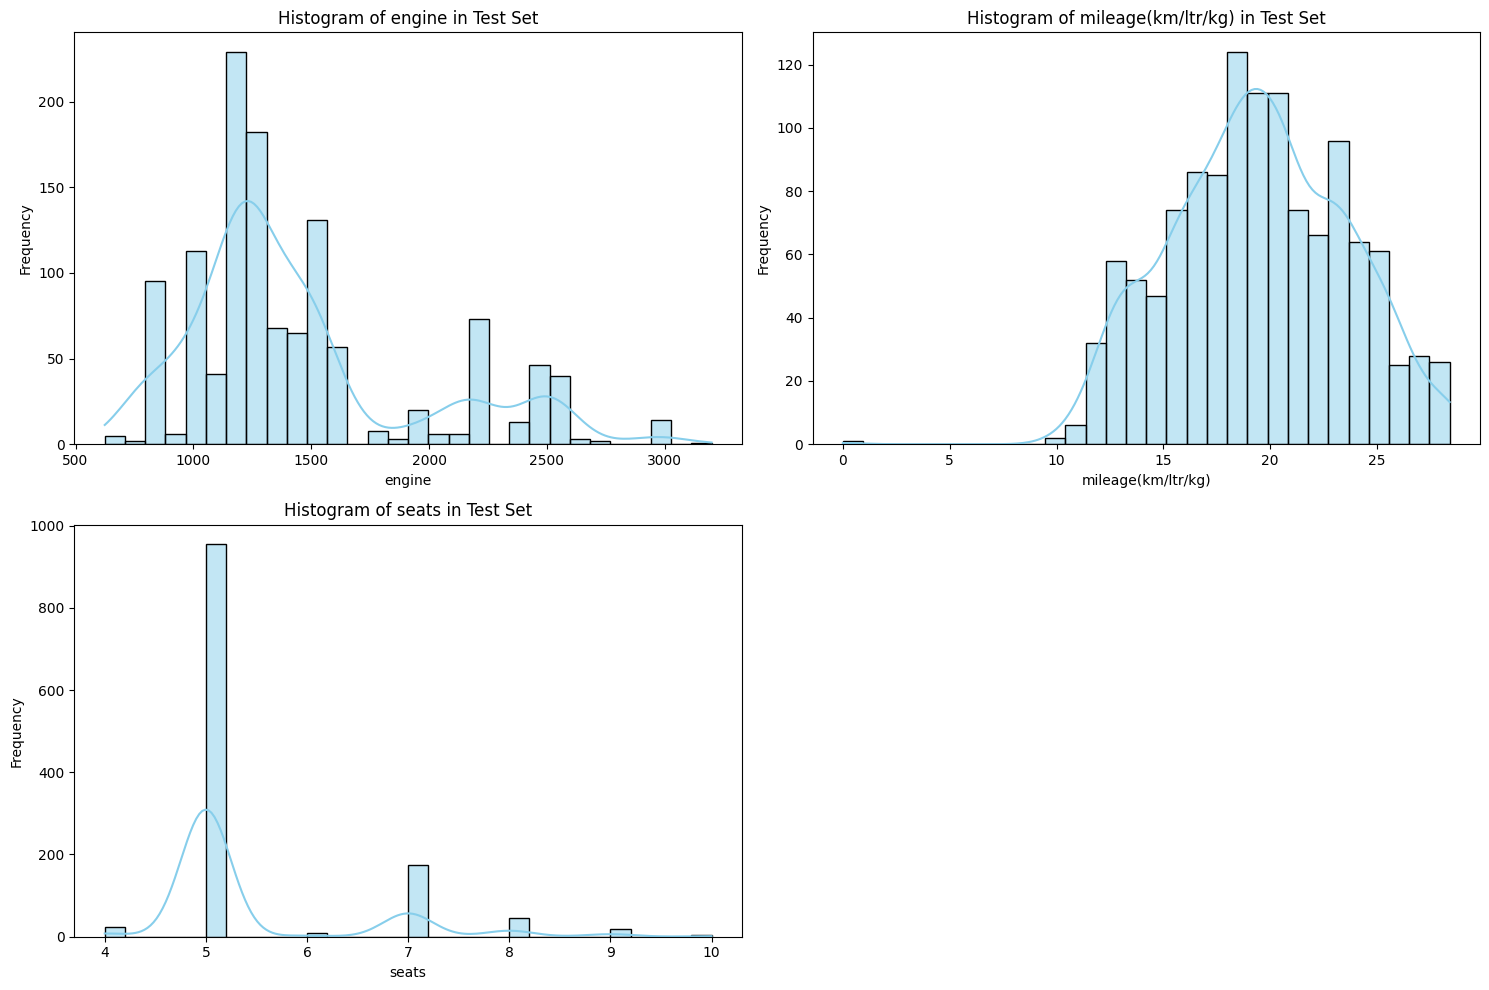

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to plot
variables = ['engine', 'mileage(km/ltr/kg)', 'seats']

# Function to plot histograms with density curves
def plot_histograms_with_density(data, variables, dataset_name):
    plt.figure(figsize=(15, 10))
    for i, variable in enumerate(variables, 1):
        plt.subplot(2, 2, i)
        sns.histplot(data[variable].dropna(), bins=30, kde=True, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {variable} in {dataset_name}')
        plt.xlabel(variable)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Plot histograms for the training set
plot_histograms_with_density(X_train, variables, 'Training Set')

# Plot histograms for the test set
plot_histograms_with_density(X_test, variables, 'Test Set')


In [ ]:
import numpy as np

# Ensure missing values are represented as NaN
X_train['engine'] = X_train['engine'].replace('missing', np.nan)
X_test['engine'] = X_test['engine'].replace('missing', np.nan)

X_train['seats'] = X_train['seats'].replace('missing', np.nan)
X_test['seats'] = X_test['seats'].replace('missing', np.nan)

X_train['mileage(km/ltr/kg)'] = X_train['mileage(km/ltr/kg)'].replace('missing', np.nan)
X_test['mileage(km/ltr/kg)'] = X_test['mileage(km/ltr/kg)'].replace('mileage(km/ltr/kg)', np.nan)

# Calculate the median for skewed variables in the training set
median_engine = X_train['engine'].median()
median_seats = X_train['seats'].median()

# Calculate the mean for non-skewed variables in the training set
mean_mileage = X_train['mileage(km/ltr/kg)'].mean()

print(f"Median of 'engine' in training set: {median_engine}")
print(f"Median of 'seats' in training set: {median_seats}")
print(f"Mean of 'mileage' in training set: {mean_mileage}")

# Replace missing values in the skewed variables with their respective medians in the training set
X_train['engine'].fillna(median_engine, inplace=True)
X_train['seats'].fillna(median_seats, inplace=True)

# Replace missing values in the skewed variables with their respective medians in the test set
X_test['engine'].fillna(median_engine, inplace=True)
X_test['seats'].fillna(median_seats, inplace=True)

# Replace missing values in the non-skewed variable with its mean in the training set
X_train['mileage(km/ltr/kg)'].fillna(mean_mileage, inplace=True)

# Replace missing values in the non-skewed variable with its mean in the test set
X_test['mileage(km/ltr/kg)'].fillna(mean_mileage, inplace=True)

# Verify imputation in the training set
print("Training set after imputing missing values:")
print(X_train[['engine', 'seats', 'mileage(km/ltr/kg)']].head())

# Verify imputation in the test set
print("Test set after imputing missing values:")
print(X_test[['engine', 'seats', 'mileage(km/ltr/kg)']].head())


Median of 'engine' in training set: 1248.0
Median of 'seats' in training set: 5.0
Mean of 'mileage' in training set: 19.4465245027681
Training set after imputing missing values:
      engine  seats  mileage(km/ltr/kg)
7796  1120.0    5.0               24.40
2975  2982.0    7.0               11.50
2700  1493.0    7.0               16.50
7257  1493.0    7.0               16.50
7264  1248.0    5.0               26.21
Test set after imputing missing values:
      engine  seats  mileage(km/ltr/kg)
2446   796.0    5.0           22.740000
492    793.0    5.0           27.620000
2012  1364.0    5.0           21.430000
7433  1248.0    5.0           19.446525
797   1198.0    7.0           20.620000


In [ ]:
# Check for missing values in the training set
missing_values_train = X_train[['engine', 'seats', 'mileage(km/ltr/kg)']].isnull().sum()
print("Missing values in the training set:")
print(missing_values_train)

# Check for missing values in the test set
missing_values_test = X_test[['engine', 'seats', 'mileage(km/ltr/kg)']].isnull().sum()
print("Missing values in the test set:")
print(missing_values_test)


Missing values in the training set:
engine                0
seats                 0
mileage(km/ltr/kg)    0
dtype: int64
Missing values in the test set:
engine                0
seats                 0
mileage(km/ltr/kg)    0
dtype: int64


In [ ]:
# Checking for missing values in the testing set
print("Missing values in testing set:")
print(X_test.isnull().sum())


# Checking for missing values in the training set
print("Missing values in training set:")
print(X_train.isnull().sum())

Missing values in testing set:
name                  0
year                  0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64
Missing values in training set:
name                  0
year                  0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64


In [ ]:
X_train_f=X_train
X_test_f= X_test

## 6.Outlier Detection

### for the Response Variable(y)

Number of outliers in selling_price: 68
Outliers in selling_price:
7522     2175000
2840     1950000
6638     2300000
7797     2051000
6724     2000000
          ...   
1410     1950000
2881     2900000
146      2650000
170     10000000
4952     6523000
Name: selling_price, Length: 68, dtype: int64


Text(0, 0.5, 'selling_price')

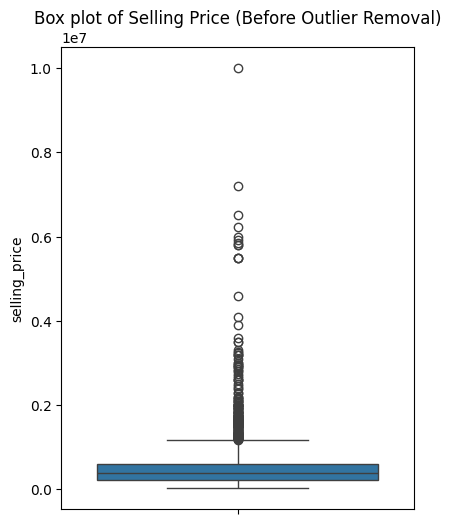

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate z-scores for 'selling_price' in the training set
selling_price_mean = np.mean(y_train)
selling_price_std = np.std(y_train)
selling_price_zscore = (y_train - selling_price_mean) / selling_price_std

# Define threshold for outliers
threshold = 3

# Identify outliers in the training set
outliers = y_train[np.abs(selling_price_zscore) > threshold]

# Print the number of outliers
print("Number of outliers in selling_price:", len(outliers))

# Print the outliers
print("Outliers in selling_price:")
print(outliers)

# Box plot of 'selling_price' with outliers highlighted
plt.figure(figsize=(10, 6))

# Box plot of 'selling_price'
plt.subplot(1, 2, 1)
sns.boxplot(y=y_train)
plt.title('Box plot of Selling Price (Before Outlier Removal)')
plt.ylabel('selling_price')



### for the quantitative predictor Variables(X)

In [ ]:
import numpy as np

# Define function to calculate Mahalanobis distance
def mahalanobis_dist(x, mean, cov_inv):
    x_minus_mean = x - mean
    dist = np.sqrt(np.dot(np.dot(x_minus_mean, cov_inv), x_minus_mean.T))
    return dist

# Define the quantitative predictor variables excluding 'selling_price'
quantitative_vars = ['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']

# Calculate the covariance matrix
cov_matrix = np.cov(X_train[quantitative_vars], rowvar=False)

# Calculate the inverse of the covariance matrix
cov_inv = np.linalg.inv(cov_matrix)

# Calculate the mean of each variable
var_means = np.mean(X_train[quantitative_vars], axis=0)

# Calculate Mahalanobis distance for each data point in the training set
distances = []
for index, row in X_train[quantitative_vars].iterrows():
    dist = mahalanobis_dist(row, var_means, cov_inv)
    distances.append(dist)

# Define threshold for outliers
threshold = np.mean(distances) + 3 * np.std(distances)

# Identify outliers
outliers_indices = np.where(distances > threshold)[0]
outliers = X_train.iloc[outliers_indices]

# Print the number of outliers
print("Number of multivariate outliers in quantitative predictor variables:", len(outliers))

# Print the indices of outliers
print("Indices of multivariate outliers:")
print(outliers_indices)

# Print the outliers
print("Multivariate outliers in quantitative predictor variables:")
print(outliers)


Number of multivariate outliers in quantitative predictor variables: 59
Indices of multivariate outliers:
[  16  176  214  386  457  467  779  898  965 1046 1163 1400 1426 1436
 1437 1536 1581 1944 1994 2031 2134 2247 2257 2259 2564 2603 2647 2871
 2908 2915 2938 3046 3168 3363 3435 3535 3572 3617 3653 3854 3996 4028
 4029 4074 4098 4112 4201 4229 4320 4370 4433 4481 4526 4562 4661 4706
 4728 4869 4927]
Multivariate outliers in quantitative predictor variables:
                                                name  year  km_driven    fuel  \
1810                          Mahindra XUV500 W6 2WD  2012    1500000  Diesel   
5242                     Tata Sumo EX 10/7 Str BSIII  2008      80000  Diesel   
2086                     Tata Sumo EX 10/7 Str BSIII  2012      67500  Diesel   
4654                         Tata Sumo Gold GX BSIII  2012     270000  Diesel   
5467    Toyota Innova 2.5 VX (Diesel) 7 Seater BS IV  2010     426000  Diesel   
5106                           Mahindra Scorpio 

# 7.Exploratory Data Analyis

### i.)Univariate analyis of Response variable(y)

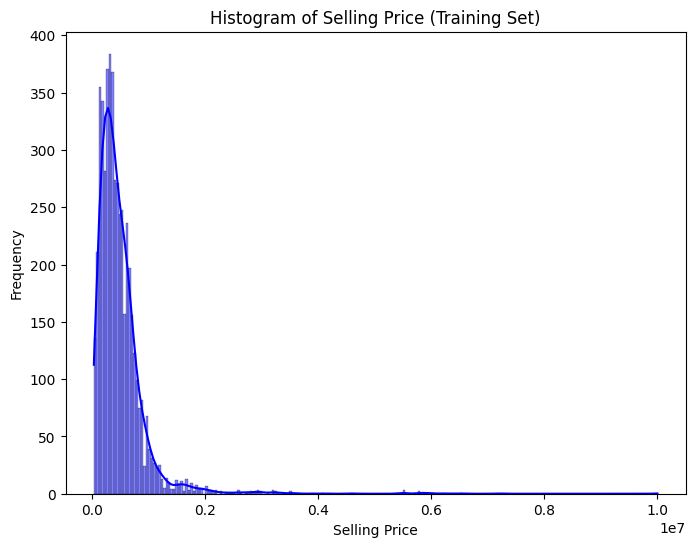

Summary statistics of Selling Price (Training Set):
count    5.040000e+03
mean     4.917964e+05
std      4.811699e+05
min      3.100000e+04
25%      2.350000e+05
50%      4.000000e+05
75%      6.100000e+05
max      1.000000e+07
Name: selling_price, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram of 'selling_price' in the training set
plt.figure(figsize=(8, 6))
sns.histplot(y_train, kde=True, color='blue', edgecolor='black')
plt.title('Histogram of Selling Price (Training Set)')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

# Summary statistics of 'selling_price' in the training set
print("Summary statistics of Selling Price (Training Set):")
print(y_train.describe())


### ii.)Bi-variate Analysis

**Since our Response variable ( selling_price) is quantitative variable,**

  

1.   scatterplots for each and every quantitative predictor variables with response variable
2.   boxplots for each and every categorical predictor varianles with response variable



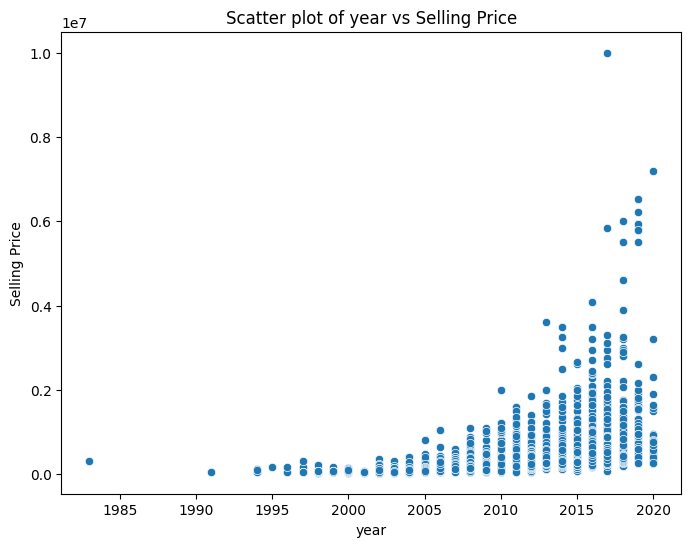

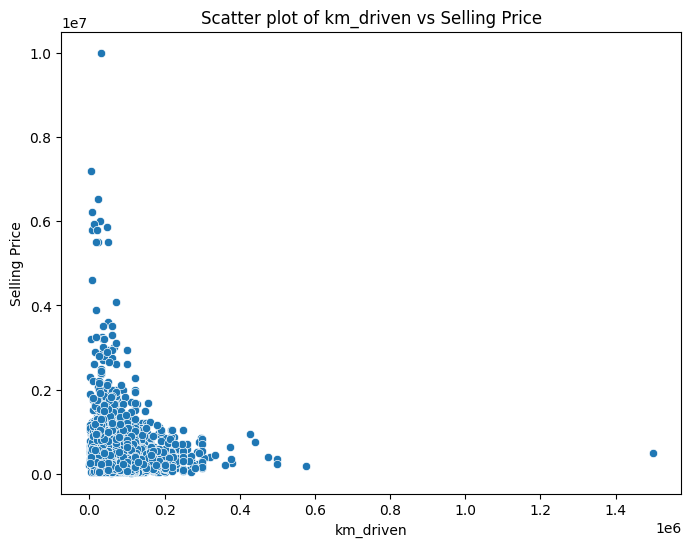

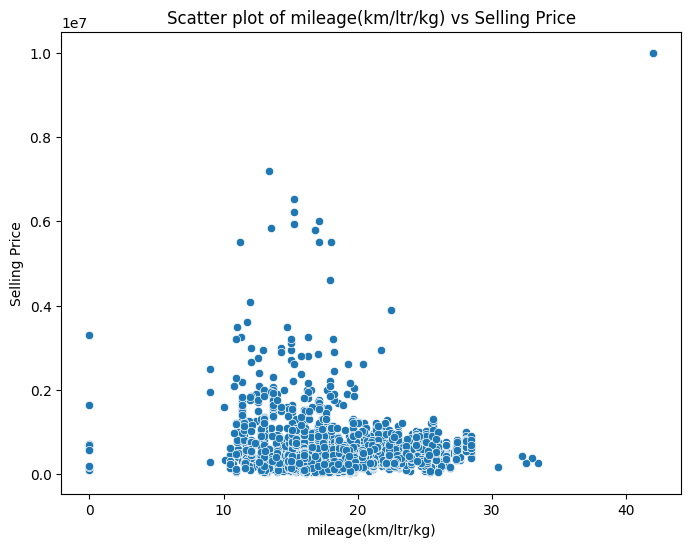

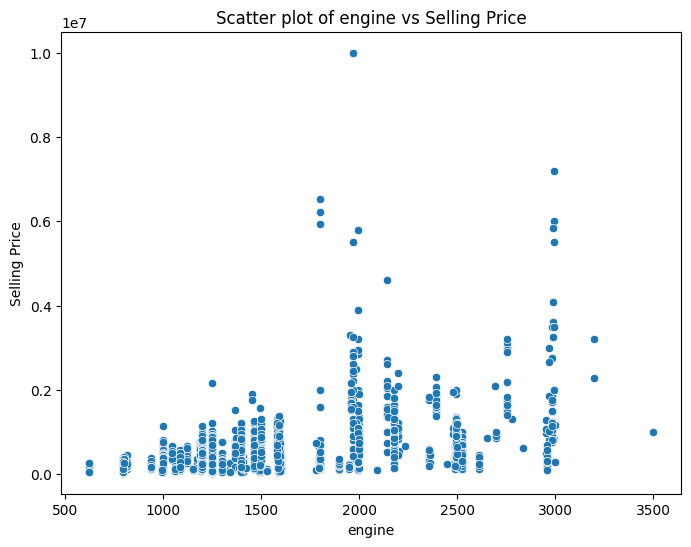

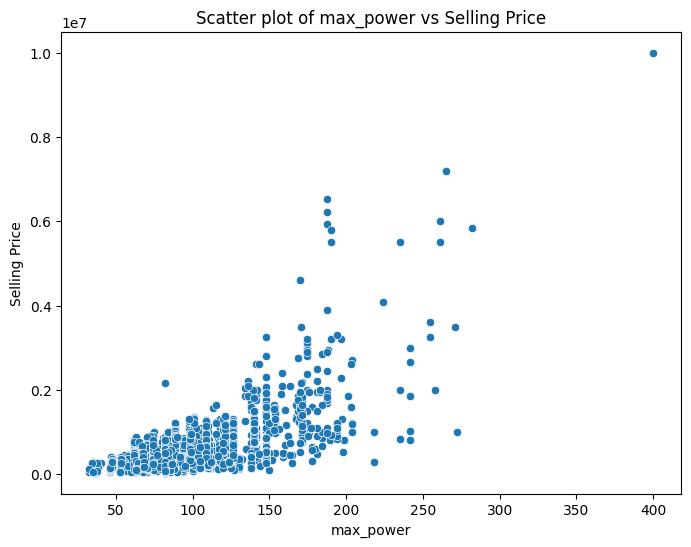

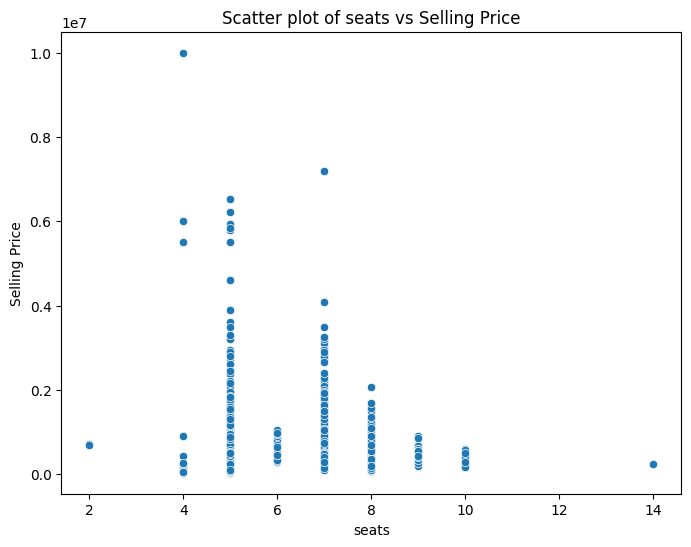

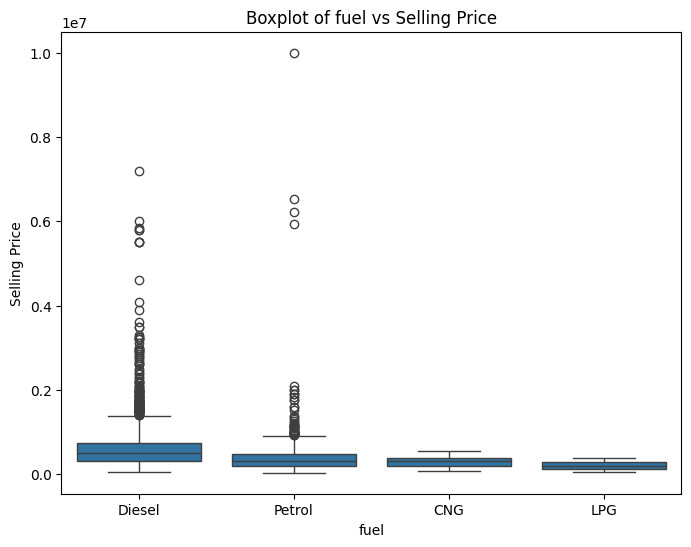

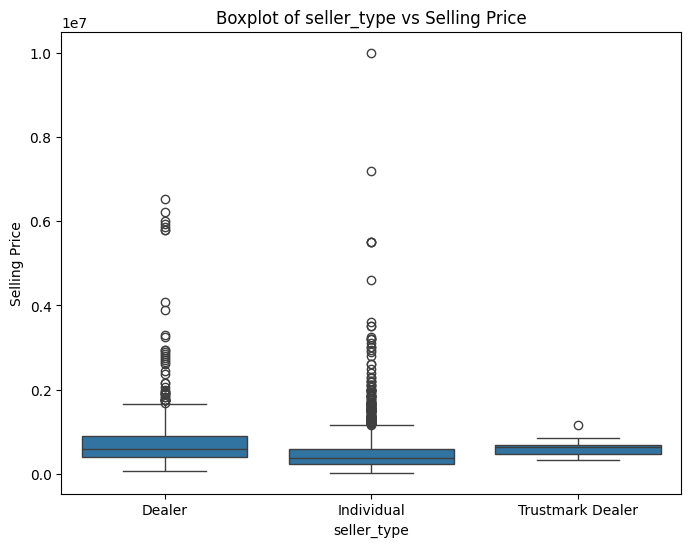

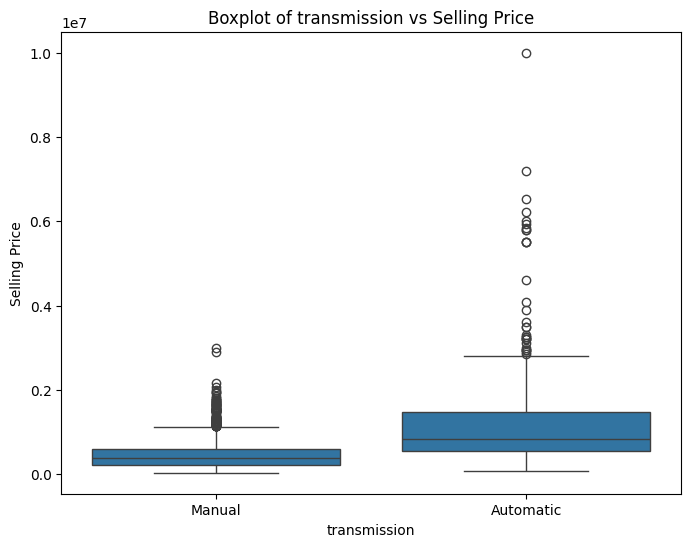

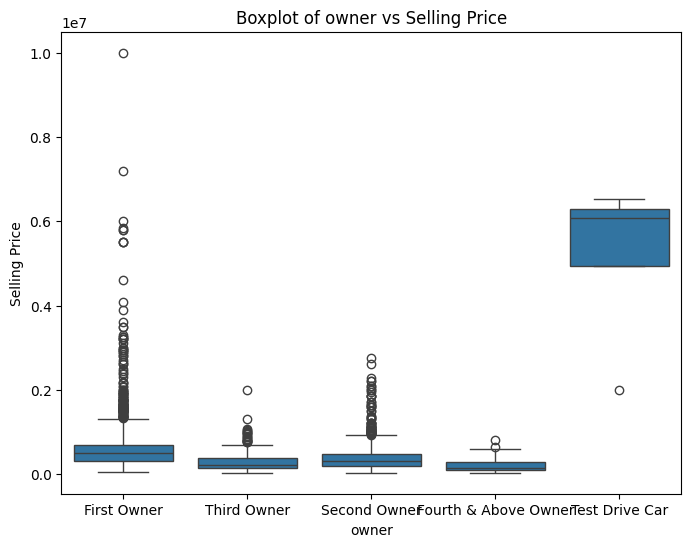

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plots for numerical variables
numerical_vars = ['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_train[var], y=y_train)
    plt.title(f'Scatter plot of {var} vs Selling Price')
    plt.xlabel(var)
    plt.ylabel('Selling Price')
    plt.show()

# Boxplots for categorical variables
categorical_vars = ['fuel', 'seller_type', 'transmission', 'owner']
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=X_train[var], y=y_train)
    plt.title(f'Boxplot of {var} vs Selling Price')
    plt.xlabel(var)
    plt.ylabel('Selling Price')
    plt.show()


Sure, let's interpret the bivariate analysis for each variable with the response variable 'selling_price':

1. Scatter plots for numerical variables:
   - **year**: There seems to be a slight positive correlation between the year of manufacture and selling price, indicating that newer cars tend to have higher selling prices.
   - **km_driven**: There is a negative correlation between kilometers driven and selling price, suggesting that cars with higher mileage tend to have lower selling prices.
   - **mileage(km/ltr/kg)**: There appears to be a slight negative correlation between mileage and selling price, indicating that cars with higher mileage may have lower selling prices.
   - **engine**: There is a positive correlation between engine size and selling price, suggesting that cars with larger engines tend to have higher selling prices.
   - **max_power**: There seems to be a positive correlation between maximum power and selling price, indicating that cars with higher power outputs tend to have higher selling prices.
   - **seats**: There is a mixed relationship between the number of seats and selling price, with no clear trend observed.

2. Boxplots for categorical variables:
   - **fuel**: Cars with fuel type 'Diesel' tend to have higher selling prices compared to other fuel types.
   - **seller_type**: Dealers tend to sell cars at higher prices compared to individuals and dealers with Warranty.
   - **transmission**: Cars with manual transmission have slightly lower selling prices compared to automatic transmission cars.
   - **owner**: First owner cars typically have higher selling prices compared to cars with multiple owners.

These interpretations provide insights into how different variables are related to the selling price of cars, helping in better understanding the factors influencing car prices.**bold text** bold text

###

# iii.for numerical predictors- checking correlations with response variable

In [ ]:
import pandas as pd

# Assuming X_train and y_train are already defined and preprocessed
# Combine the training features and target variable
train_data = X_train.copy()
train_data['selling_price'] = y_train

# Define the quantitative variables
quantitative_vars = ['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']

# Calculate the correlation of each quantitative variable with the response variable 'selling_price'
correlations = train_data[quantitative_vars + ['selling_price']].corr()

# Extract the correlations with 'selling_price'
selling_price_correlations = correlations['selling_price'].drop('selling_price')

# Display the correlations
print(selling_price_correlations)


year                  0.439003
km_driven            -0.165372
mileage(km/ltr/kg)   -0.090891
engine                0.432211
max_power             0.670504
seats                 0.195159
Name: selling_price, dtype: float64


# iv.Correlation heatmap - for all quantitative predictor variables
### (for identifying multicollinearity)

                        year  km_driven  mileage(km/ltr/kg)    engine  \
year                1.000000  -0.387204            0.347994  0.001358   
km_driven          -0.387204   1.000000           -0.216171  0.284601   
mileage(km/ltr/kg)  0.347994  -0.216171            1.000000 -0.573274   
engine              0.001358   0.284601           -0.573274  1.000000   
max_power           0.149539   0.059635           -0.370163  0.680017   
seats               0.058309   0.213672           -0.457917  0.669608   

                    max_power     seats  
year                 0.149539  0.058309  
km_driven            0.059635  0.213672  
mileage(km/ltr/kg)  -0.370163 -0.457917  
engine               0.680017  0.669608  
max_power            1.000000  0.281912  
seats                0.281912  1.000000  


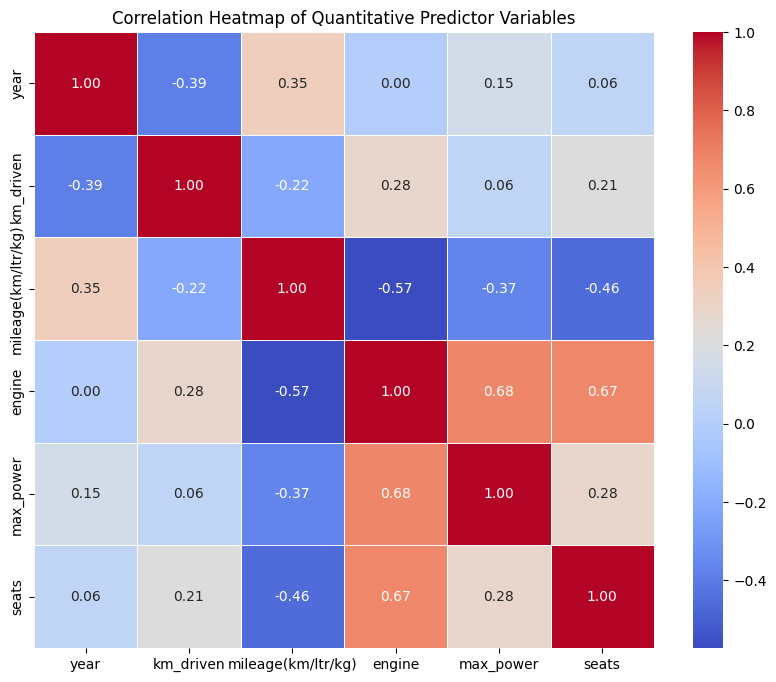

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Define the quantitative predictor variables
quantitative_vars = ['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']

# Calculate the correlation matrix
correlation_matrix = X_train[quantitative_vars].corr()

# Display the correlation matrix
print(correlation_matrix)


# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Quantitative Predictor Variables')
plt.show()


###Comments on Multicollinearity


####**Strong Correlations:**

engine and max_power (0.680): Strong positive correlation suggests multicollinearity. Cars with larger engines tend to have higher max power.

engine and seats (0.670): Strong positive correlation indicates multicollinearity. Cars with larger engines tend to have more seats.

mileage(km/ltr/kg) and engine (-0.573): Strong negative correlation suggests that cars with better mileage have smaller engines.


####**Moderate Correlations:**

year and mileage(km/ltr/kg) (0.348): Newer cars tend to have better mileage.

mileage(km/ltr/kg) and seats (-0.458): Cars with better mileage tend to have fewer seats.

mileage(km/ltr/kg) and max_power (-0.370): Cars with better mileage tend to have lower max power.


####**Weak Correlations:**

The other correlations are weak, indicating minor or no multicollinearity issues.

### Recommendations

**1.Address Multicollinearity:**

Use Variance Inflation Factor (VIF) to further investigate and quantify multicollinearity.
Consider combining or transforming correlated variables to reduce multicollinearity.

**2.Feature Engineering:**

Create new features to capture the relationship between correlated variables.
Use dimensionality reduction techniques like Principal Component Analysis (PCA).

**3.Model Selection:**

Apply regularization techniques like Ridge or Lasso regression to handle multicollinearity by penalizing large coefficients.

# v.Identify association between categorical predictors and quantitative response



1.   Spearman correlation - if categorical variables are ordinal + quantitative response variable
2.   Krushkalwalis test - for all categorical variables( except nominal + quantitative response variable







*   Checking the Ordinal variables and Nominal variables



In [ ]:


# Define the categorical variables
categorical_vars = ['fuel', 'seller_type', 'transmission', 'owner', 'name']

# Initialize dictionaries to hold nominal and ordinal variables
nominal_vars = []
ordinal_vars = []

# Define a function to categorize the variables
def categorize_variables(variable):
    if variable == 'owner':
        ordinal_vars.append(variable)
    else:
        nominal_vars.append(variable)

# Categorize each variable
for var in categorical_vars:
    categorize_variables(var)

# Print the categorized variables
print("Nominal variables:", nominal_vars)
print("Ordinal variables:", ordinal_vars)

# Check unique values for each variable to confirm their types
for var in categorical_vars:
    print(f"Unique values for {var}:")
    print(data[var].unique())
    print()


Nominal variables: ['fuel', 'seller_type', 'transmission', 'name']
Ordinal variables: ['owner']
Unique values for fuel:
['Diesel' 'Petrol' 'LPG' 'CNG']

Unique values for seller_type:
['Individual' 'Dealer' 'Trustmark Dealer']

Unique values for transmission:
['Manual' 'Automatic']

Unique values for owner:
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']

Unique values for name:
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Kia Seltos HTX Plus AT D'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']



# 1.Spearman correlation

In [ ]:
# Import necessary libraries
import pandas as pd
from scipy.stats import spearmanr

# Assuming 'data' is your DataFrame
# Convert 'owner' to ordinal data type if it's not already
data['owner'] = data['owner'].astype('category').cat.codes

# Calculate the Spearman correlation between 'owner' and 'selling_price'
spearman_corr, p_value = spearmanr(data['owner'], data['selling_price'])

# Print the results
print(f"Spearman correlation between 'owner' and 'selling_price': {spearman_corr:.4f}")
print(f"P-value: {p_value:.4e}")

# Interpret the p-value
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis. There is a significant association between 'owner' and 'selling_price'.")
else:
    print("Do not reject the null hypothesis. There is no significant association between 'owner' and 'selling_price'.")



Spearman correlation between 'owner' and 'selling_price': -0.3653
P-value: 3.1760e-198
Reject the null hypothesis. There is a significant association between 'owner' and 'selling_price'.


<ipython-input-120-0a03efafb231>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['owner'] = data['owner'].astype('category').cat.codes


### Interpretation and Comments on Spearman Correlation Results

#### Spearman Correlation Coefficient
- **Spearman Correlation Coefficient between 'owner' and 'selling_price': -0.3653**
  - The Spearman correlation coefficient measures the strength and direction of the monotonic relationship between two ranked variables.
  - A coefficient of -0.3653 indicates a moderate negative monotonic relationship between 'owner' and 'selling_price'.
  - This suggests that as the 'owner' category increases (which may represent an increase in the number of previous owners), the 'selling_price' tends to decrease.

#### P-value
- **P-value: 3.1759532123300914e-198**
  - The p-value tests the null hypothesis that there is no association between the two variables.
  - A very small p-value (close to 0) indicates strong evidence against the null hypothesis, suggesting that the observed correlation is statistically significant.
  - In this case, the p-value is extremely small, meaning the correlation is highly significant, and we can confidently say there is an association between 'owner' and 'selling_price'.

(H0): There is no significant correlation between the variables. In this context, the correlation coefficient (ρ) is zero.
 :ρ=0

(H1): There is a significant correlation between the variables. In this context, the correlation coefficient (ρ) is not zero.

If p≤α: Reject the null hypothesis (H0). There is significant evidence to suggest that there is a correlation between the variables.(Small p-value (typically ≤ 0.05): Strong evidence against the null hypothesis, suggesting that there is a significant association between the variables.)

If p>α: Do not reject the null hypothesis (H0). There is not enough evidence to suggest that there is a correlation between the variables.


### Comments
- **Practical Implication**
  - The negative correlation indicates that cars with more previous owners tend to have a lower selling price. This is consistent with the expectation that cars with fewer previous owners are perceived as better maintained and hence have higher resale values.

- **Moderate Correlation**
  - While the correlation is moderate, it is important to consider other factors that might influence the selling price, such as the car's age, mileage, and condition.

- **Monotonic Relationship**
  - The relationship is monotonic but not necessarily linear. This means that while the trend is downward as the number of owners increases, the rate of decrease in selling price might not be constant.

- **Warnings and Data Handling**
  - The warning message regarding `SettingWithCopyWarning` suggests that you may be modifying a copy of a DataFrame slice. To avoid potential issues, it's recommended to use `.loc` for assignments or work on a deep copy of the DataFrame.

### Recommendations
- **Further Analysis**
  - Consider analyzing other factors in conjunction with the number of owners to get a more comprehensive understanding of what drives the selling price.
  - Perform a multivariate regression analysis to see how 'owner' interacts with other variables in predicting 'selling_price'.

- **Handling Categorical Data**
  - When dealing with categorical variables like 'owner', ensure proper encoding and interpretation. The categorical codes used here should correctly reflect the ordinal nature of the 'owner' variable.

### Conclusion
## The negative Spearman correlation between 'owner' and 'selling_price' is significant and moderate, indicating that an increase in the number of previous owners is associated with a decrease in selling price. This finding aligns with common market expectations and can be useful in predictive modeling and pricing strategies.

# 2.Krushkal-walis test

In [ ]:
import pandas as pd
from scipy.stats import kruskal

# Assuming `data` is your DataFrame and `X_train` is your training set


# Kruskal-Wallis test for 'fuel' and 'selling_price'
groups_fuel = [data['selling_price'][data['fuel'] == category] for category in data['fuel'].unique()]
stat_fuel, p_value_fuel = kruskal(*groups_fuel)

print(f"Kruskal-Wallis test for 'fuel' and 'selling_price':")
print(f"Statistic: {stat_fuel}")
print(f"P-value: {p_value_fuel}")

if p_value_fuel <= 0.05:
    print("Reject the null hypothesis. There is a significant difference in 'selling_price' between different 'fuel' groups.")
else:
    print("Do not reject the null hypothesis. There is no significant difference in 'selling_price' between different 'fuel' groups.")




Kruskal-Wallis test for 'fuel' and 'selling_price':
Statistic: 898.82081086357
P-value: 1.595143692462546e-194
Reject the null hypothesis. There is a significant difference in 'selling_price' between different 'fuel' groups.


In [ ]:
# Kruskal-Wallis test for 'seller_type' and 'selling_price'
groups_seller_type = [data['selling_price'][data['seller_type'] == category] for category in data['seller_type'].unique()]
stat_seller_type, p_value_seller_type = kruskal(*groups_seller_type)

print(f"Kruskal-Wallis test for 'seller_type' and 'selling_price':")
print(f"Statistic: {stat_seller_type}")
print(f"P-value: {p_value_seller_type}")

if p_value_seller_type <= 0.05:
    print("Reject the null hypothesis. There is a significant difference in 'selling_price' between different 'seller_type' groups.")
else:
    print("Do not reject the null hypothesis. There is no significant difference in 'selling_price' between different 'seller_type' groups.")


Kruskal-Wallis test for 'seller_type' and 'selling_price':
Statistic: 251.74057026923856
P-value: 2.1638628480117702e-55
Reject the null hypothesis. There is a significant difference in 'selling_price' between different 'seller_type' groups.


In [ ]:
# Kruskal-Wallis test for 'transmission' and 'selling_price'
groups_transmission = [data['selling_price'][data['transmission'] == category] for category in data['transmission'].unique()]
stat_transmission, p_value_transmission = kruskal(*groups_transmission)

print(f"Kruskal-Wallis test for 'transmission' and 'selling_price':")
print(f"Statistic: {stat_transmission}")
print(f"P-value: {p_value_transmission}")

if p_value_transmission <= 0.05:
    print("Reject the null hypothesis. There is a significant difference in 'selling_price' between different 'transmission' groups.")
else:
    print("Do not reject the null hypothesis. There is no significant difference in 'selling_price' between different 'transmission' groups.")


Kruskal-Wallis test for 'transmission' and 'selling_price':
Statistic: 483.04713150426045
P-value: 4.6419342602117646e-107
Reject the null hypothesis. There is a significant difference in 'selling_price' between different 'transmission' groups.


In [ ]:
# Kruskal-Wallis test for 'name' and 'selling_price'
groups_name = [data['selling_price'][data['name'] == category] for category in data['name'].unique()]
stat_name, p_value_name = kruskal(*groups_name)

print(f"Kruskal-Wallis test for 'name' and 'selling_price':")
print(f"Statistic: {stat_name}")
print(f"P-value: {p_value_name}")

if p_value_name <= 0.05:
    print("Reject the null hypothesis. There is a significant difference in 'selling_price' between different 'name' groups.")
else:
    print("Do not reject the null hypothesis. There is no significant difference in 'selling_price' between different 'name' groups.")


Kruskal-Wallis test for 'name' and 'selling_price':
Statistic: 5815.179574617398
P-value: 0.0
Reject the null hypothesis. There is a significant difference in 'selling_price' between different 'name' groups.


# vi.Clustering



### *  K-means clustering- for quantitative predictor variables



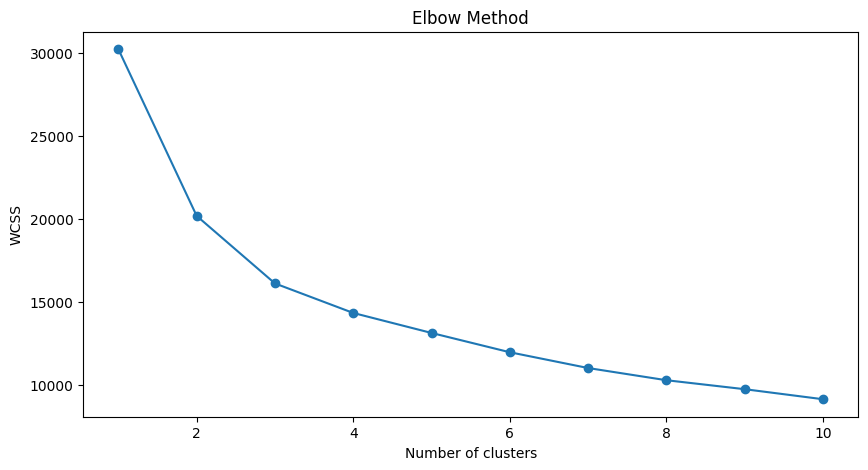

<ipython-input-125-ecf75236cd0d>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_f['cluster'] = clusters


In [ ]:
# Import Necessary Libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the training set
quantitative_vars = ['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']
X_train_f = X_train[quantitative_vars]

# Standardize the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_f)

# Determine the Optimal Number of Clusters (Using Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit the K-Means Model with the chosen number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X_train_scaled)

# Add the cluster labels to the original DataFrame
X_train_f['cluster'] = clusters



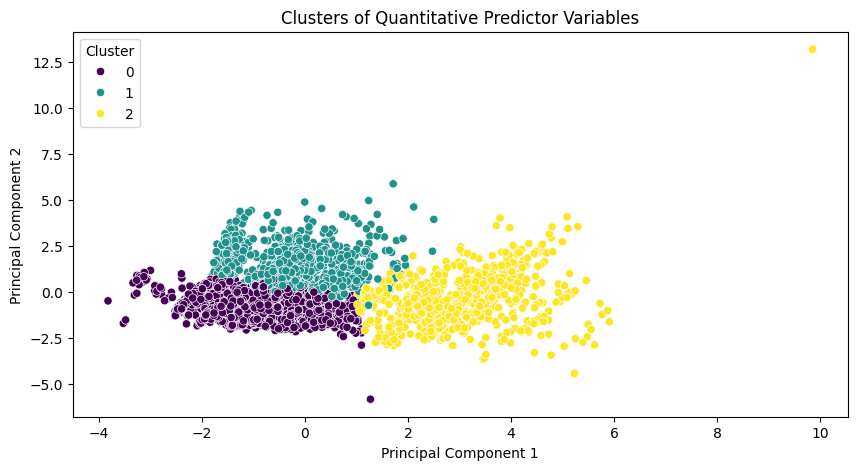

In [ ]:
# Visualize the Clusters in 2D using the first two principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train_scaled)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=X_train_f['cluster'], palette='viridis')
plt.title('Clusters of Quantitative Predictor Variables')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
# from sklearn.model_selection import KFold
import scipy as sp
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# 9.Feature scaling

essential to ensure that all features contribute equally to the model. Here, we'll use StandardScaler from sklearn to standardize the quantitative predictor variables in both the training and test sets.

In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'X_train' and 'X_test' are your training and test feature sets

#Although the year is a quantitative predictor, but usually we do not scaling the time series values
#so keep time series value as it is

# Define the quantitative predictor variables
quantitative_vars = ['km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']

# Step 2: Initialize the Scaler
scaler = StandardScaler()

# Step 3: Fit the Scaler on the Training Data
scaler.fit(X_train[quantitative_vars])

# Step 4: Transform Both Training and Test Data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[quantitative_vars] = scaler.transform(X_train[quantitative_vars])
X_test_scaled[quantitative_vars] = scaler.transform(X_test[quantitative_vars])

# Step 5: Verify the Scaled Data
print("Scaled Training Data:")
print(X_train_scaled.head())

print("\nScaled Test Data:")
print(X_test_scaled.head())


Scaled Training Data:
                                name  year  km_driven    fuel seller_type  \
7796     Hyundai Xcent 1.1 CRDi Base  2015  -0.384079  Diesel      Dealer   
2975      Toyota Fortuner 3.0 Diesel  2011   0.844973  Diesel  Individual   
2700  Mahindra Bolero Power Plus SLX  2017   0.466803  Diesel  Individual   
7257  Mahindra Bolero Power Plus ZLX  2017  -0.289536  Diesel  Individual   
7264            Maruti Ciaz VDi Plus  2015  -0.478621  Diesel  Individual   

     transmission         owner  mileage(km/ltr/kg)    engine  max_power  \
7796       Manual   First Owner            1.245595 -0.613326  -0.512262   
2975       Manual   Third Owner           -1.998224  3.238251   2.781366   
2700       Manual  Second Owner           -0.740930  0.158231  -0.545198   
7257       Manual  Second Owner           -0.740930  0.158231  -0.545198   
7264       Manual   First Owner            1.700736 -0.348556   0.064123   

         seats  
7796 -0.431940  
2975  1.631546  
2700  1



*   Each feature in quantitative_vars will have a mean close to 0 and a standard deviation close to 1 in the training data.

*   The test data will be scaled based on the training data statistics, ensuring consistency across both datasets.

*   Handling Missing Values: Ensure that missing values are handled before scaling, as StandardScaler does not handle missing values.



# 10.Encoding the categorical variables

Nominal and Ordinal Categorical variables need to be encoded into numerical formats to be used in machine learning models.

Encoding Nominal Variables:
Nominal variables do not have an inherent order. The common method to encode nominal variables is One-Hot Encoding.

Encoding Ordinal Variables:
Ordinal variables have a meaningful order. The common method to encode ordinal variables is Ordinal Encoding.

In [ ]:
#Handling Categorical Variables with Unique Values
#Names typically have high cardinality, meaning there are many unique values.
#Encoding these directly can lead to computational complexity without adding significant predictive power.
#Recommendation: If names don’t carry meaningful information relevant to the prediction task, it’s best to remove them

#'X_train_scaled'  and 'X_test_scaled'  are my two sets of data after the feature scaling

# Drop the 'name' column in both X_train_scaled and X_test_scaled
X_train_scaled = X_train_scaled.drop(columns=['name'])
X_test_scaled = X_test_scaled.drop(columns=['name'])

# Display the transformed DataFrames to confirm the column has been dropped
print(X_train_scaled.head())
print(X_test_scaled.head())



      year  km_driven    fuel seller_type transmission         owner  \
7796  2015  -0.384079  Diesel      Dealer       Manual   First Owner   
2975  2011   0.844973  Diesel  Individual       Manual   Third Owner   
2700  2017   0.466803  Diesel  Individual       Manual  Second Owner   
7257  2017  -0.289536  Diesel  Individual       Manual  Second Owner   
7264  2015  -0.478621  Diesel  Individual       Manual   First Owner   

      mileage(km/ltr/kg)    engine  max_power     seats  
7796            1.245595 -0.613326  -0.512262 -0.431940  
2975           -1.998224  3.238251   2.781366  1.631546  
2700           -0.740930  0.158231  -0.545198  1.631546  
7257           -0.740930  0.158231  -0.545198  1.631546  
7264            1.700736 -0.348556   0.064123 -0.431940  
      year  km_driven    fuel seller_type transmission         owner  \
2446  2014  -0.289536  Petrol  Individual       Manual  Second Owner   
492   2016  -0.100451  Diesel  Individual       Manual   First Owner   
201

In [ ]:
X_train_scaled.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
7796,2015,-0.384079,Diesel,Dealer,Manual,First Owner,1.245595,-0.613326,-0.512262,-0.431940
2975,2011,0.844973,Diesel,Individual,Manual,Third Owner,-1.998224,3.238251,2.781366,1.631546
2700,2017,0.466803,Diesel,Individual,Manual,Second Owner,-0.740930,0.158231,-0.545198,1.631546
7257,2017,-0.289536,Diesel,Individual,Manual,Second Owner,-0.740930,0.158231,-0.545198,1.631546
7264,2015,-0.478621,Diesel,Individual,Manual,First Owner,1.700736,-0.348556,0.064123,-0.431940


In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Example DataFrames
# X_train_scaled and X_test_scaled are your scaled datasets

# Identify the ordinal and nominal variables
ordinal_vars = ['owner']  # Replace with your actual ordinal variables if different
nominal_vars = ['fuel', 'seller_type', 'transmission']  # Replace with your actual nominal variables

# Ensure that the columns are present in the dataset
ordinal_vars = [var for var in ordinal_vars if var in X_train_scaled.columns]
nominal_vars = [var for var in nominal_vars if var in X_train_scaled.columns]

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform on training set, transform on test set
X_train_scaled[ordinal_vars] = ordinal_encoder.fit_transform(X_train_scaled[ordinal_vars])
X_test_scaled[ordinal_vars] = ordinal_encoder.transform(X_test_scaled[ordinal_vars])

# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform on training set, transform on test set
X_train_encoded_nominal = onehot_encoder.fit_transform(X_train_scaled[nominal_vars])
X_test_encoded_nominal = onehot_encoder.transform(X_test_scaled[nominal_vars])

# Convert the arrays back to DataFrames with appropriate column names
X_train_encoded_nominal = pd.DataFrame(X_train_encoded_nominal, columns=onehot_encoder.get_feature_names_out(nominal_vars), index=X_train_scaled.index)
X_test_encoded_nominal = pd.DataFrame(X_test_encoded_nominal, columns=onehot_encoder.get_feature_names_out(nominal_vars), index=X_test_scaled.index)

# Drop the original nominal columns from the scaled dataframes
X_train_scaled = X_train_scaled.drop(columns=nominal_vars)
X_test_scaled = X_test_scaled.drop(columns=nominal_vars)

# Concatenate the encoded nominal columns back to the original dataframes
X_train_scaled = pd.concat([X_train_scaled, X_train_encoded_nominal], axis=1)
X_test_scaled = pd.concat([X_test_scaled, X_test_encoded_nominal], axis=1)

# Display the transformed DataFrames to confirm the changes
print(X_train_scaled.head())
print(X_test_scaled.head())


      year  km_driven  owner  mileage(km/ltr/kg)    engine  max_power  \
7796  2015  -0.384079    0.0            1.245595 -0.613326  -0.512262   
2975  2011   0.844973    4.0           -1.998224  3.238251   2.781366   
2700  2017   0.466803    2.0           -0.740930  0.158231  -0.545198   
7257  2017  -0.289536    2.0           -0.740930  0.158231  -0.545198   
7264  2015  -0.478621    0.0            1.700736 -0.348556   0.064123   

         seats  fuel_CNG  fuel_Diesel  fuel_LPG  fuel_Petrol  \
7796 -0.431940       0.0          1.0       0.0          0.0   
2975  1.631546       0.0          1.0       0.0          0.0   
2700  1.631546       0.0          1.0       0.0          0.0   
7257  1.631546       0.0          1.0       0.0          0.0   
7264 -0.431940       0.0          1.0       0.0          0.0   

      seller_type_Dealer  seller_type_Individual  \
7796                 1.0                     0.0   
2975                 0.0                     1.0   
2700                

In [ ]:
X_train_scaled.head()

,year,km_driven,owner,mileage(km/ltr/kg),engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
7796,2015,-0.384079,0.0,1.245595,-0.613326,-0.512262,-0.431940,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2975,2011,0.844973,4.0,-1.998224,3.238251,2.781366,1.631546,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2700,2017,0.466803,2.0,-0.740930,0.158231,-0.545198,1.631546,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7257,2017,-0.289536,2.0,-0.740930,0.158231,-0.545198,1.631546,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7264,2015,-0.478621,0.0,1.700736,-0.348556,0.064123,-0.431940,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
X_test_scaled.head()

,year,km_driven,owner,mileage(km/ltr/kg),engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
2446,2014,-0.289536,2.0,8.281735e-01,-1.283525,-1.292852,-0.431940,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
492,2016,-0.100451,0.0,2.055293e+00,-1.289730,-1.302733,-0.431940,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2012,2017,-1.329503,0.0,4.987624e-01,-0.108608,0.007802,-0.431940,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7433,2009,0.296627,2.0,8.933612e-16,-0.348556,-0.155562,-0.431940,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
797,2015,-1.140418,0.0,2.950808e-01,-0.451981,-0.644007,1.631546,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


# 11.Model fitting






# 1.   Linear Regression




In [ ]:

X_train = X_train_scaled
X_test = X_test_scaled

# Assuming y_train and y_test are already defined
# y_train = ...
# y_test = ...


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the training and test data
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Calculate R-squared and RMSE for the training set
r2_train_lr = r2_score(y_train, y_train_pred_lr)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))

# Calculate R-squared and RMSE for the test set
r2_test_lr = r2_score(y_test, y_test_pred_lr)
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))

# Print the results
print(f"Linear Regression Training R-squared: {r2_train_lr}")
print(f"Linear Regression Training RMSE: {rmse_train_lr}")
print(f"Linear Regression Test R-squared: {r2_test_lr}")
print(f"Linear Regression Test RMSE: {rmse_test_lr}")

# Check for overfitting
if r2_train_lr > r2_test_lr and rmse_train_lr < rmse_test_lr:
    print("The model is likely overfitting.")
else:
    print("The model is not overfitting.")


Linear Regression Training R-squared: 0.6046087877435358
Linear Regression Training RMSE: 302530.2832547683
Linear Regression Test R-squared: 0.610439713770361
Linear Regression Test RMSE: 257304.48130516137
The model is not overfitting.



# 2.   Lasso Regression



In [ ]:
from sklearn.linear_model import Lasso

# Initialize the Lasso Regressor
lasso_model = Lasso(alpha=1.0, random_state=42)

# Fit the model on the training data
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the training and test data
y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate R-squared and RMSE for the training set
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))

# Calculate R-squared and RMSE for the test set
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

# Print the results
print(f"Lasso Regression Training R-squared: {r2_train_lasso}")
print(f"Lasso Regression Training RMSE: {rmse_train_lasso}")
print(f"Lasso Regression Test R-squared: {r2_test_lasso}")
print(f"Lasso Regression Test RMSE: {rmse_test_lasso}")

# Check for overfitting
if r2_train_lasso > r2_test_lasso and rmse_train_lasso < rmse_test_lasso:
    print("The model is likely overfitting.")
else:
    print("The model is not overfitting.")


Lasso Regression Training R-squared: 0.6046087847537945
Lasso Regression Training RMSE: 302530.28439855605
Lasso Regression Test R-squared: 0.6104435344010997
Lasso Regression Test RMSE: 257303.21953919652
The model is not overfitting.



# 3.Ridge regression



In [ ]:
from sklearn.linear_model import Ridge

# Initialize the Ridge Regressor
ridge_model = Ridge(alpha=1.0, random_state=42)

# Fit the model on the training data
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the training and test data
y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)

# Calculate R-squared and RMSE for the training set
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))

# Calculate R-squared and RMSE for the test set
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

# Print the results
print(f"Ridge Regression Training R-squared: {r2_train_ridge}")
print(f"Ridge Regression Training RMSE: {rmse_train_ridge}")
print(f"Ridge Regression Test R-squared: {r2_test_ridge}")
print(f"Ridge Regression Test RMSE: {rmse_test_ridge}")

# Check for overfitting
if r2_train_ridge > r2_test_ridge and rmse_train_ridge < rmse_test_ridge:
    print("The model is likely overfitting.")
else:
    print("The model is not overfitting.")


Ridge Regression Training R-squared: 0.6046077122656348
Ridge Regression Training RMSE: 302530.6947009546
Ridge Regression Test R-squared: 0.6105260938232338
Ridge Regression Test RMSE: 257275.9527208782
The model is not overfitting.


# 4.KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the training data
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the training and test data
y_train_pred_knn = knn_model.predict(X_train_scaled)
y_test_pred_knn = knn_model.predict(X_test_scaled)

# Calculate R-squared and RMSE for the training set
r2_train_knn = r2_score(y_train, y_train_pred_knn)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))

# Calculate R-squared and RMSE for the test set
r2_test_knn = r2_score(y_test, y_test_pred_knn)
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))

# Print the results
print(f"KNN Regression Training R-squared: {r2_train_knn}")
print(f"KNN Regression Training RMSE: {rmse_train_knn}")
print(f"KNN Regression Test R-squared: {r2_test_knn}")
print(f"KNN Regression Test RMSE: {rmse_test_knn}")

# Check for overfitting
if r2_train_knn > r2_test_knn and rmse_train_knn < rmse_test_knn:
    print("The model is likely overfitting.")
else:
    print("The model is not overfitting.")


KNN Regression Training R-squared: 0.8681558834184775
KNN Regression Training RMSE: 174697.1117705812
KNN Regression Test R-squared: 0.845605207890227
KNN Regression Test RMSE: 161985.57263370548
The model is not overfitting.


# 5.ElasticNet Regressor

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize the ElasticNet Regressor
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

# Fit the model on the training data
elastic_net_model.fit(X_train_scaled, y_train)

# Make predictions on the training and test data
y_train_pred_elastic_net = elastic_net_model.predict(X_train_scaled)
y_test_pred_elastic_net = elastic_net_model.predict(X_test_scaled)

# Calculate R-squared and RMSE for the training set
r2_train_elastic_net = r2_score(y_train, y_train_pred_elastic_net)
rmse_train_elastic_net = np.sqrt(mean_squared_error(y_train, y_train_pred_elastic_net))

# Calculate R-squared and RMSE for the test set
r2_test_elastic_net = r2_score(y_test, y_test_pred_elastic_net)
rmse_test_elastic_net = np.sqrt(mean_squared_error(y_test, y_test_pred_elastic_net))

# Print the results
print(f"Elastic Net Training R-squared: {r2_train_elastic_net}")
print(f"Elastic Net Training RMSE: {rmse_train_elastic_net}")
print(f"Elastic Net Test R-squared: {r2_test_elastic_net}")
print(f"Elastic Net Test RMSE: {rmse_test_elastic_net}")

# Check for overfitting
if r2_train_elastic_net > r2_test_elastic_net and rmse_train_elastic_net < rmse_test_elastic_net:
    print("The model is likely overfitting.")
else:
    print("The model is not overfitting.")


Elastic Net Training R-squared: 0.5558618224643326
Elastic Net Training RMSE: 320637.56426943664
Elastic Net Test R-squared: 0.6129924657440473
Elastic Net Test RMSE: 256460.04960922705
The model is not overfitting.


# 6.PLSRegression

In [ ]:
from sklearn.cross_decomposition import PLSRegression

# Initialize the PLSR model
plsr_model = PLSRegression(n_components=2)

# Fit the model on the training data
plsr_model.fit(X_train_scaled, y_train)

# Make predictions on the training and test data
y_train_pred_plsr = plsr_model.predict(X_train_scaled)
y_test_pred_plsr = plsr_model.predict(X_test_scaled)

# Calculate R-squared and RMSE for the training set
r2_train_plsr = r2_score(y_train, y_train_pred_plsr)
rmse_train_plsr = np.sqrt(mean_squared_error(y_train, y_train_pred_plsr))

# Calculate R-squared and RMSE for the test set
r2_test_plsr = r2_score(y_test, y_test_pred_plsr)
rmse_test_plsr = np.sqrt(mean_squared_error(y_test, y_test_pred_plsr))

# Print the results
print(f"PLSR Training R-squared: {r2_train_plsr}")
print(f"PLSR Training RMSE: {rmse_train_plsr}")
print(f"PLSR Test R-squared: {r2_test_plsr}")
print(f"PLSR Test RMSE: {rmse_test_plsr}")

# Check for overfitting
if r2_train_plsr > r2_test_plsr and rmse_train_plsr < rmse_test_plsr:
    print("The model is likely overfitting.")
else:
    print("The model is not overfitting.")


PLSR Training R-squared: 0.5752839383055406
PLSR Training RMSE: 313548.473138582
PLSR Test R-squared: 0.5670441906576738
PLSR Test RMSE: 271257.52673257596
The model is not overfitting.


# 7.DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the training and test data
y_train_pred_dt = dt_model.predict(X_train_scaled)
y_test_pred_dt = dt_model.predict(X_test_scaled)

# Calculate R-squared and RMSE for the training set
r2_train_dt = r2_score(y_train, y_train_pred_dt)
rmse_train_dt = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))

# Calculate R-squared and RMSE for the test set
r2_test_dt = r2_score(y_test, y_test_pred_dt)
rmse_test_dt = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))

# Print the results
print(f"Decision Tree Regression Training R-squared: {r2_train_dt}")
print(f"Decision Tree Regression Training RMSE: {rmse_train_dt}")
print(f"Decision Tree Regression Test R-squared: {r2_test_dt}")
print(f"Decision Tree Regression Test RMSE: {rmse_test_dt}")

# Check for overfitting
if r2_train_dt > r2_test_dt and rmse_train_dt < rmse_test_dt:
    print("The model is likely overfitting.")
else:
    print("The model is not overfitting.")


Decision Tree Regression Training R-squared: 0.9991364292636714
Decision Tree Regression Training RMSE: 14138.531578659808
Decision Tree Regression Test R-squared: 0.7737116776964086
Decision Tree Regression Test RMSE: 196106.09114850854
The model is likely overfitting.


**Hyperparameter tuning for Tree based models!**
**Usually we do hyperparametr tuning for the 'Tree based models' **

**But if a model gives highest accuracy, then tune the hyperparameters to get the better naximum accuracy of it as well **

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train_scaled, y_train)

# Best parameters and model
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")
best_dt_model = grid_search_dt.best_estimator_

# Predictions and evaluations
y_train_pred_dt = best_dt_model.predict(X_train_scaled)
y_test_pred_dt = best_dt_model.predict(X_test_scaled)
r2_train_dt = r2_score(y_train, y_train_pred_dt)
rmse_train_dt = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
r2_test_dt = r2_score(y_test, y_test_pred_dt)
rmse_test_dt = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))

print(f"Decision Tree Training R-squared: {r2_train_dt}")
print(f"Decision Tree Training RMSE: {rmse_train_dt}")
print(f"Decision Tree Test R-squared: {r2_test_dt}")
print(f"Decision Tree Test RMSE: {rmse_test_dt}")

# Check for overfitting
if r2_train_dt > r2_test_dt and rmse_train_dt < rmse_test_dt:
    print("The Decision Tree model is likely overfitting.")
else:
    print("The Decision Tree model is not overfitting.")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree Training R-squared: 0.8914773045306069
Decision Tree Training RMSE: 158495.0246480059
Decision Tree Test R-squared: 0.7183752467566733
Decision Tree Test RMSE: 218773.85728168918
The Decision Tree model is likely overfitting.


# 8.Random Forest Regressor and its hyperparamter tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the training and test data
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Calculate R-squared and RMSE for the training set
r2_train_rf = r2_score(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))

# Calculate R-squared and RMSE for the test set
r2_test_rf = r2_score(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

# Print the results
print(f"Random Forest Regression Training R-squared: {r2_train_rf}")
print(f"Random Forest Regression Training RMSE: {rmse_train_rf}")
print(f"Random Forest Regression Test R-squared: {r2_test_rf}")
print(f"Random Forest Regression Test RMSE: {rmse_test_rf}")

# Check for overfitting
if r2_train_rf > r2_test_rf and rmse_train_rf < rmse_test_rf:
    print("The model is likely overfitting.")
else:
    print("The model is not overfitting.")


Random Forest Regression Training R-squared: 0.9815315205448735
Random Forest Regression Training RMSE: 65383.9144948655
Random Forest Regression Test R-squared: 0.8623619543950856
Random Forest Regression Test RMSE: 152942.87881734653
The model is likely overfitting.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters and model
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
best_rf_model = grid_search_rf.best_estimator_

# Predictions and evaluations
y_train_pred_rf = best_rf_model.predict(X_train_scaled)
y_test_pred_rf = best_rf_model.predict(X_test_scaled)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
r2_test_rf = r2_score(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

print(f"Random Forest Training R-squared: {r2_train_rf}")
print(f"Random Forest Training RMSE: {rmse_train_rf}")
print(f"Random Forest Test R-squared: {r2_test_rf}")
print(f"Random Forest Test RMSE: {rmse_test_rf}")

# Check for overfitting
if r2_train_rf > r2_test_rf and rmse_train_rf < rmse_test_rf:
    print("The Random Forest model is likely overfitting.")
else:
    print("The Random Forest model is not overfitting.")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Training R-squared: 0.98101483180939
Random Forest Training RMSE: 66292.22139895166
Random Forest Test R-squared: 0.8529818883453653
Random Forest Test RMSE: 158068.53641154576
The Random Forest model is likely overfitting.


# 9.XG Boost and its hyperparameter tuning

In [ ]:
import xgboost as xgb

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=1000,
                             learning_rate=0.01,
                             max_depth=3,
                             reg_alpha=10,
                             reg_lambda=10,
                             random_state=42)

# Train the model with early stopping
xgb_model.fit(X_train_scaled, y_train,
              eval_set=[(X_train_scaled, y_train), (X_test_scaled, y_test)],
              early_stopping_rounds=50,
              verbose=True)

# Make predictions on the training and test data
y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculate R-squared and RMSE for the training set
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))

# Calculate R-squared and RMSE for the test set
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

# Print the results
print(f"XGBoost Training R-squared: {r2_train_xgb}")
print(f"XGBoost Training RMSE: {rmse_train_xgb}")
print(f"XGBoost Test R-squared: {r2_test_xgb}")
print(f"XGBoost Test RMSE: {rmse_test_xgb}")

# Check for overfitting
if r2_train_xgb > r2_test_xgb and rmse_train_xgb < rmse_test_xgb:
    print("The model is likely overfitting.")
else:
    print("The model is not overfitting.")



[0]	validation_0-rmse:478315.13924	validation_1-rmse:409442.35062
[1]	validation_0-rmse:475541.30548	validation_1-rmse:406667.89238
[2]	validation_0-rmse:472800.32792	validation_1-rmse:403927.57800
[3]	validation_0-rmse:470091.92690	validation_1-rmse:401221.13397
[4]	validation_0-rmse:467415.46666	validation_1-rmse:398532.14549
[5]	validation_0-rmse:464770.61198	validation_1-rmse:395891.75569
[6]	validation_0-rmse:462156.99039	validation_1-rmse:393271.39362
[7]	validation_0-rmse:459574.44055	validation_1-rmse:390695.90444
[8]	validation_0-rmse:457022.36114	validation_1-rmse:388143.01452
[9]	validation_0-rmse:454500.88707	validation_1-rmse:385618.77415
[10]	validation_0-rmse:452005.38715	validation_1-rmse:383122.80099
[11]	validation_0-rmse:449542.24630	validation_1-rmse:380671.60326
[12]	validation_0-rmse:447105.10902	validation_1-rmse:378243.95658
[13]	validation_0-rmse:444699.54257	validation_1-rmse:375827.34132
[14]	validation_0-rmse:442319.63224	validation_1-rmse:373459.88040
[15]	

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:413356.79454	validation_1-rmse:346607.35986
[28]	validation_0-rmse:411263.81041	validation_1-rmse:344786.05953
[29]	validation_0-rmse:409180.25338	validation_1-rmse:342936.01542
[30]	validation_0-rmse:407126.87530	validation_1-rmse:341134.45488
[31]	validation_0-rmse:405096.56162	validation_1-rmse:339381.19065
[32]	validation_0-rmse:403020.75282	validation_1-rmse:337593.99353
[33]	validation_0-rmse:401029.68040	validation_1-rmse:335866.65912
[34]	validation_0-rmse:399061.42906	validation_1-rmse:334142.64580
[35]	validation_0-rmse:397042.56204	validation_1-rmse:332418.94292
[36]	validation_0-rmse:395111.89648	validation_1-rmse:330733.95990
[37]	validation_0-rmse:393224.47097	validation_1-rmse:329085.02853
[38]	validation_0-rmse:391262.29248	validation_1-rmse:327403.93475
[39]	validation_0-rmse:389386.51541	validation_1-rmse:325901.07902
[40]	validation_0-rmse:387530.50611	validation_1-rmse:324413.75392
[41]	validation_0-rmse:385660.30792	validation_1-rmse:322668.6

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0.1, 0.5, 1, 2]
}

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform Grid Search with Cross-Validation
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_scaled, y_train)

# Best parameters and model
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")
best_xgb_model = grid_search_xgb.best_estimator_

# Predictions and evaluations
y_train_pred_xgb = best_xgb_model.predict(X_train_scaled)
y_test_pred_xgb = best_xgb_model.predict(X_test_scaled)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

print(f"XGBoost Training R-squared: {r2_train_xgb}")
print(f"XGBoost Training RMSE: {rmse_train_xgb}")
print(f"XGBoost Test R-squared: {r2_test_xgb}")
print(f"XGBoost Test RMSE: {rmse_test_xgb}")

# Check for overfitting
if r2_train_xgb > r2_test_xgb and rmse_train_xgb < rmse_test_xgb:
    print("The XGBoost model is likely overfitting.")
else:
    print("The XGBoost model is not overfitting.")


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 0.5, 'reg_lambda': 2}
XGBoost Training R-squared: 0.9500153035698049
XGBoost Training RMSE: 107565.71716084606
XGBoost Test R-squared: 0.8733733554733617
XGBoost Test RMSE: 146697.44885789283
The XGBoost model is likely overfitting.


# 10. Gradient Boosting and its hyperparametr tuning

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=3, random_state=42)

# Fit the model on the training data
gb_model.fit(X_train_scaled, y_train)

# Make predictions on the training and test data
y_train_pred_gb = gb_model.predict(X_train_scaled)
y_test_pred_gb = gb_model.predict(X_test_scaled)

# Calculate R-squared and RMSE for the training set
r2_train_gb = r2_score(y_train, y_train_pred_gb)
rmse_train_gb = np.sqrt(mean_squared_error(y_train, y_train_pred_gb))

# Calculate R-squared and RMSE for the test set
r2_test_gb = r2_score(y_test, y_test_pred_gb)
rmse_test_gb = np.sqrt(mean_squared_error(y_test, y_test_pred_gb))

# Print the results
print(f"Gradient Boosting Regression Training R-squared: {r2_train_gb}")
print(f"Gradient Boosting Regression Training RMSE: {rmse_train_gb}")
print(f"Gradient Boosting Regression Test R-squared: {r2_test_gb}")
print(f"Gradient Boosting Regression Test RMSE: {rmse_test_gb}")

# Check for overfitting
if r2_train_gb > r2_test_gb and rmse_train_gb < rmse_test_gb:
    print("The model is likely overfitting.")
else:
    print("The model is not overfitting.")


Gradient Boosting Regression Training R-squared: 0.9357225346799735
Gradient Boosting Regression Training RMSE: 121978.90180301898
Gradient Boosting Regression Test R-squared: 0.8595091244717831
Gradient Boosting Regression Test RMSE: 154519.77656006973
The model is likely overfitting.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train_scaled, y_train)

# Best parameters and model
print(f"Best parameters for Gradient Boosting: {grid_search_gb.best_params_}")
best_gb_model = grid_search_gb.best_estimator_

# Predictions and evaluations
y_train_pred_gb = best_gb_model.predict(X_train_scaled)
y_test_pred_gb = best_gb_model.predict(X_test_scaled)
r2_train_gb = r2_score(y_train, y_train_pred_gb)
rmse_train_gb = np.sqrt(mean_squared_error(y_train, y_train_pred_gb))
r2_test_gb = r2_score(y_test, y_test_pred_gb)
rmse_test_gb = np.sqrt(mean_squared_error(y_test, y_test_pred_gb))

print(f"Gradient Boosting Training R-squared: {r2_train_gb}")
print(f"Gradient Boosting Training RMSE: {rmse_train_gb}")
print(f"Gradient Boosting Test R-squared: {r2_test_gb}")
print(f"Gradient Boosting Test RMSE: {rmse_test_gb}")

# Check for overfitting
if r2_train_gb > r2_test_gb and rmse_train_gb < rmse_test_gb:
    print("The Gradient Boosting model is likely overfitting.")
else:
    print("The Gradient Boosting model is not overfitting.")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 300}
Gradient Boosting Training R-squared: 0.986548183504789
Gradient Boosting Training RMSE: 55801.49246916421
Gradient Boosting Test R-squared: 0.8908063729343929
Gradient Boosting Test RMSE: 136225.57760893577
The Gradient Boosting model is likely overfitting.


* When you save a file in Google Colab,
 it is saved in the virtual machine (VM) provided by Colab.

 * This environment is temporary and will be reset once the session is terminated.

 * Here’s a step-by-step explanation on how to save, locate, and download the pickle file in Google Colab:

In [ ]:
#First, let's save your best model as a pickle file in Google Colab.

import pickle
with open('best_gradient_boosting_model.pkl', 'wb') as file:
    pickle.dump(best_gb_model, file)


In [ ]:
X_train_scaled.columns

Index(['year', 'km_driven', 'owner', 'mileage(km/ltr/kg)', 'engine',
       'max_power', 'seats', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual'],
      dtype='object')

In [ ]:
best_gb_model = grid_search_gb.best_estimator_

In [ ]:
#The file best_gradient_boosting_model.pkl is saved in the current working directory of the Colab environment.
# To see where the file is saved, you can list the files in the current directory:
#Verify the File is Saved:


import os

# List files in the current directory
print(os.listdir('.'))


['.config', 'best_gradient_boosting_model.pkl', 'drive', 'sample_data']


This confirms that your model file best_gradient_boosting_model.pkl is saved in the current directory.

This will print a list of all files in the current directory,
 and you should see best_gradient_boosting_model.pkl listed.

Using the File Explorer:
On the left side of the Colab interface, you will see a folder icon.
Click on it to open the file explorer.
You should see your file best_gradient_boosting_model.pkl there.

In [ ]:
#To download the file to your local machine, use the following code:

from google.colab import files

# Download the file
files.download('best_gradient_boosting_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

If you want to keep the file for future sessions, it is better to save it to Google Drive.

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Save the File to Google Drive:

with open('/content/drive/My Drive/best_gradient_boosting_model.pkl', 'wb') as file:
    pickle.dump(best_gb_model, file)


In [ ]:
# List files in your Google Drive to verify
#Verify the File is in Google Drive:

print(os.listdir('/content/drive/My Drive'))


['Classroom', 'Navoda_Gunarathne .jpg', 'CV_Navoda_Gunarathne.pdf', 'Give same as in AWS data platform and Microsoft d....gdoc', 'CV_SNN_Gunarathne (1).pdf', 'CV_Navoda.pdf', 'Colab Notebooks', 'Carprice.csv', 'Carprice_prediction.ipynb', 'video1342877534.mp4', 'video1241245796.mp4', 'video1658756659.mp4', 'best_gradient_boosting_model.pkl']


In [ ]:
#Load the File from Google Drive:

with open('/content/drive/My Drive/best_gradient_boosting_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


**Summary**

* Save: When you save a file in Colab, it is stored in the VM's file system.

* Locate: Use os.listdir('.') or the file explorer to see where the file is saved.

* Download: Use files.download() to download the file to your local machine.

* Persistent Storage: Use Google Drive to save and load files across different sessions.